In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../..")

print('Current location: ', os.getcwd())

Current location:  /home/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


# Visualizations

In [4]:
import os
import pandas as pd

from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.custom_classes.experiments_visualizer import ExperimentsVisualizer

## Initialize Configs

In [5]:
EXPERIMENT_NAME = 'stress_testing_with_cols_imp_nulls'
DB_COLLECTION_NAME = f'exp_{EXPERIMENT_NAME}'
DATASET_NAME = 'COMPAS'
EXPERIMENT_SESSION_UUID = '4dcca348-d667-4e41-bc9d-234796af4dbf'
SENSITIVE_ATTRS = ['sex', 'race', 'sex&race']
PREPROCESSING_TECHNIQUES = ['cat: mode, num: median']

In [6]:
MODEL_NAMES = ['LogisticRegression']

FEATURE_IMPORTANCE = {
    'Original_Column': ['baseline', 'age', 'juv_other_count', 'priors_count', 'c_charge_degree_F'],
    'Column_Abs_Imp': [None, 0.40, 0.02, 0.56, 0.00],
    'Column_With_Imp': ['baseline', 'age (-0.40)', 'juv_other_count (0.02)', 'priors_count (0.56)', 'c_charge_degree_F (0.00)'],
}
feature_imp_df = pd.DataFrame.from_dict(FEATURE_IMPORTANCE)
feature_imp_df.head()

,Original_Column,Column_Abs_Imp,Column_With_Imp
0,baseline,NaN,baseline
1,age,0.40,age (-0.40)
2,juv_other_count,0.02,juv_other_count (0.02)
3,priors_count,0.56,priors_count (0.56)
4,c_charge_degree_F,0.00,c_charge_degree_F (0.00)


In [7]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [8]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [9]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(80, 25)

In [10]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].head(20)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,Dataset_Split_Seed,Model_Init_Seed,Injector_Config_Lst,overall,race_dis,race_priv,sex&race_dis,sex&race_priv,sex_dis,sex_priv
0,Accuracy,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,0,OK,2023-05-02 17:14:10.795,...,100,100,"['priors_count', 'age', 'juv_other_count', 'c_...",0.715909,0.721362,0.707317,0.713755,0.723404,0.709602,0.742574
1,Accuracy,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,1,OK,2023-05-02 17:14:10.804,...,100,100,"['priors_count', 'age', 'juv_other_count', 'c_...",0.634470,0.613003,0.668293,0.594796,0.680851,0.620609,0.693069
2,Accuracy,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,2,OK,2023-05-02 17:14:10.816,...,100,100,"['priors_count', 'age', 'juv_other_count', 'c_...",0.693182,0.712074,0.663415,0.698885,0.702128,0.681499,0.742574
3,Accuracy,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,3,OK,2023-05-02 17:14:10.828,...,100,100,"['priors_count', 'age', 'juv_other_count', 'c_...",0.715909,0.721362,0.707317,0.713755,0.723404,0.709602,0.742574
4,Accuracy,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,4,OK,2023-05-02 17:14:10.841,...,100,100,"['priors_count', 'age', 'juv_other_count', 'c_...",0.715909,0.721362,0.707317,0.713755,0.723404,0.709602,0.742574
5,Entropy,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,0,OK,2023-05-02 17:14:10.795,...,100,100,"['priors_count', 'age', 'juv_other_count', 'c_...",0.107135,0.114223,0.095967,0.000000,0.000000,0.102829,0.125339
6,Entropy,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,1,OK,2023-05-02 17:14:10.804,...,100,100,"['priors_count', 'age', 'juv_other_count', 'c_...",0.090311,0.098384,0.077592,0.000000,0.000000,0.084920,0.113106
7,Entropy,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,2,OK,2023-05-02 17:14:10.816,...,100,100,"['priors_count', 'age', 'juv_other_count', 'c_...",0.000000,0.101443,0.000000,0.000000,0.000000,0.000000,0.118476
8,Entropy,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,3,OK,2023-05-02 17:14:10.828,...,100,100,"['priors_count', 'age', 'juv_other_count', 'c_...",0.106519,0.114223,0.094382,0.000000,0.000000,0.102068,0.125339
9,Entropy,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,4,OK,2023-05-02 17:14:10.841,...,100,100,"['priors_count', 'age', 'juv_other_count', 'c_...",0.106765,0.113680,0.095869,0.000000,0.000000,0.102371,0.125339


In [11]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct()

In [12]:
exp_avg_group_metrics_dct = exp_composer.compose_group_metrics(exp_subgroup_metrics_dct)

In [13]:
exp_subgroup_metrics_dct[MODEL_NAMES[0]][PREPROCESSING_TECHNIQUES[0]]['Exp_iter_1']['baseline'].head(50)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,Dataset_Split_Seed,Model_Init_Seed,Injector_Config_Lst,overall,race_dis,race_priv,sex&race_dis,sex&race_priv,sex_dis,sex_priv
0,Accuracy,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,0,OK,2023-05-02 17:14:10.795,...,100,100,"['priors_count', 'age', 'juv_other_count', 'c_...",0.715909,0.721362,0.707317,0.713755,0.723404,0.709602,0.742574
5,Entropy,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,0,OK,2023-05-02 17:14:10.795,...,100,100,"['priors_count', 'age', 'juv_other_count', 'c_...",0.107135,0.114223,0.095967,0.000000,0.000000,0.102829,0.125339
10,F1,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,0,OK,2023-05-02 17:14:10.795,...,100,100,"['priors_count', 'age', 'juv_other_count', 'c_...",0.696356,0.742857,0.583333,0.749186,0.518519,0.707547,0.628571
15,FNR,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,0,OK,2023-05-02 17:14:10.795,...,100,100,"['priors_count', 'age', 'juv_other_count', 'c_...",0.338462,0.257143,0.505882,0.248366,0.611111,0.318182,0.450000
20,FPR,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,0,OK,2023-05-02 17:14:10.795,...,100,100,"['priors_count', 'age', 'juv_other_count', 'c_...",0.231343,0.304054,0.141667,0.336207,0.068966,0.260870,0.131148
25,IQR,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,0,OK,2023-05-02 17:14:10.795,...,100,100,"['priors_count', 'age', 'juv_other_count', 'c_...",0.020015,0.021061,0.018368,0.021468,0.016567,0.020520,0.017884
30,Jitter,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,0,OK,2023-05-02 17:14:10.795,...,100,100,"['priors_count', 'age', 'juv_other_count', 'c_...",0.080471,0.086206,0.071436,0.078232,0.057683,0.077231,0.094169
35,Label_Stability,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,0,OK,2023-05-02 17:14:10.795,...,100,100,"['priors_count', 'age', 'juv_other_count', 'c_...",0.886364,0.878019,0.899512,0.889219,0.923404,0.890398,0.869307
40,Mean,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,0,OK,2023-05-02 17:14:10.795,...,100,100,"['priors_count', 'age', 'juv_other_count', 'c_...",0.517018,0.487480,0.563558,0.483097,0.572623,0.511872,0.538776
45,PPV,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,0,OK,2023-05-02 17:14:10.795,...,100,100,"['priors_count', 'age', 'juv_other_count', 'c_...",0.735043,0.742857,0.711864,0.746753,0.777778,0.735294,0.733333


In [28]:
exp_subgroup_metrics_dct[MODEL_NAMES[0]][PREPROCESSING_TECHNIQUES[0]]['Exp_iter_1']['priors_count'].head(50)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,Dataset_Split_Seed,Model_Init_Seed,Injector_Config_Lst,overall,race_dis,race_priv,sex&race_dis,sex&race_priv,sex_dis,sex_priv
1,Accuracy,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,1,OK,2023-05-02 17:14:10.804,...,100,100,"['priors_count', 'age', 'juv_other_count', 'c_...",0.634470,0.613003,0.668293,0.594796,0.680851,0.620609,0.693069
6,Entropy,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,1,OK,2023-05-02 17:14:10.804,...,100,100,"['priors_count', 'age', 'juv_other_count', 'c_...",0.090311,0.098384,0.077592,0.000000,0.000000,0.084920,0.113106
11,F1,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,1,OK,2023-05-02 17:14:10.804,...,100,100,"['priors_count', 'age', 'juv_other_count', 'c_...",0.560364,0.590164,0.492537,0.588679,0.400000,0.566845,0.523077
16,FNR,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,1,OK,2023-05-02 17:14:10.804,...,100,100,"['priors_count', 'age', 'juv_other_count', 'c_...",0.526923,0.485714,0.611765,0.490196,0.722222,0.518182,0.575000
21,FPR,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,1,OK,2023-05-02 17:14:10.804,...,100,100,"['priors_count', 'age', 'juv_other_count', 'c_...",0.208955,0.270270,0.133333,0.293103,0.068966,0.231884,0.131148
26,IQR,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,1,OK,2023-05-02 17:14:10.804,...,100,100,"['priors_count', 'age', 'juv_other_count', 'c_...",0.017777,0.018083,0.017293,0.017968,0.015276,0.017940,0.017084
31,Jitter,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,1,OK,2023-05-02 17:14:10.804,...,100,100,"['priors_count', 'age', 'juv_other_count', 'c_...",0.067003,0.073065,0.057453,0.063775,0.044917,0.062816,0.084708
36,Label_Stability,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,1,OK,2023-05-02 17:14:10.804,...,100,100,"['priors_count', 'age', 'juv_other_count', 'c_...",0.908333,0.899690,0.921951,0.913755,0.944681,0.914286,0.883168
41,Mean,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,1,OK,2023-05-02 17:14:10.804,...,100,100,"['priors_count', 'age', 'juv_other_count', 'c_...",0.543060,0.522178,0.575961,0.523929,0.586214,0.542054,0.547312
46,PPV,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,10,1,OK,2023-05-02 17:14:10.804,...,100,100,"['priors_count', 'age', 'juv_other_count', 'c_...",0.687151,0.692308,0.673469,0.696429,0.714286,0.688312,0.680000


## Metrics Visualization and Reporting

In [15]:
visualizer = ExperimentsVisualizer(exp_subgroup_metrics_dct=exp_subgroup_metrics_dct,
                                   exp_avg_runs_group_metrics_dct=exp_avg_group_metrics_dct,
                                   dataset_name=DATASET_NAME,
                                   model_names=MODEL_NAMES,
                                   sensitive_attrs=SENSITIVE_ATTRS)

### Specific subgroup metric per dataset and multiple models

In [26]:
visualizer.create_subgroups_grid_pct_lines_plot_for_col_imp(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                            model_name=MODEL_NAMES[0],
                                                            subgroup_metrics=['Jitter', 'Label_Stability', 'F1', 'Accuracy'],
                                                            sort_cols_lst=['baseline', 'c_charge_degree_F (0.00)',
                                                                           'juv_other_count (0.02)', 'age (-0.40)', 'priors_count (0.56)'],
                                                            feature_imp_df=feature_imp_df)

alt.VConcatChart(...)

### Box plots for subgroup metrics per model and error level

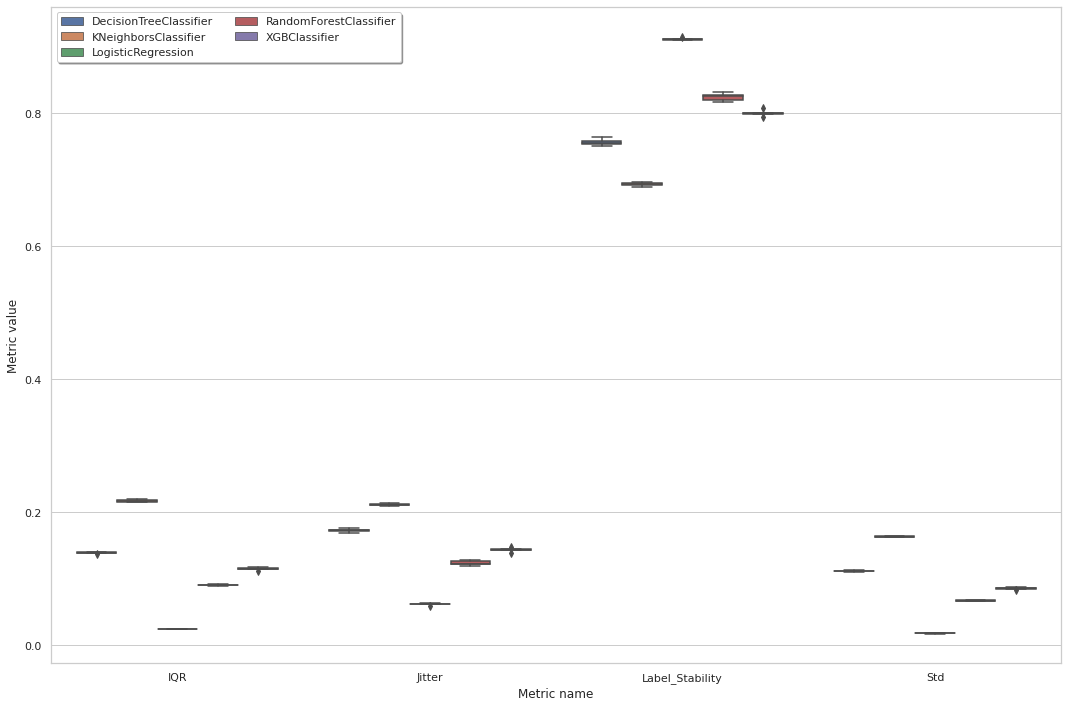

In [89]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                     subgroup_metrics_type='variance')

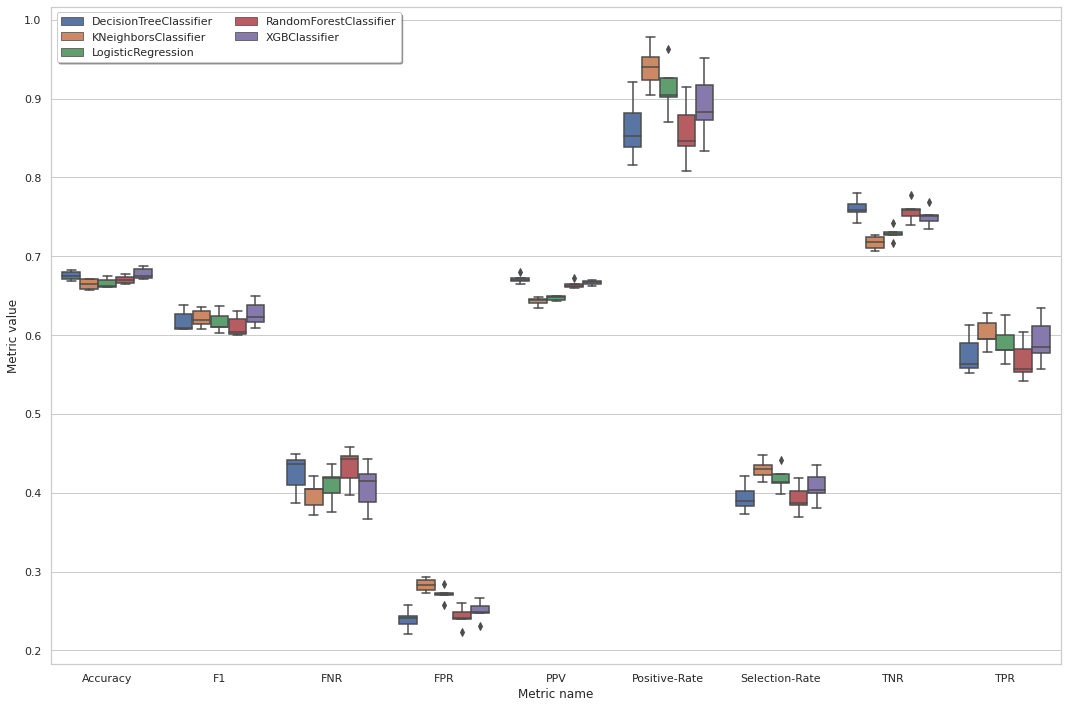

In [90]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                     subgroup_metrics_type='error')

### One box plot for both error and variance metrics for subgroups

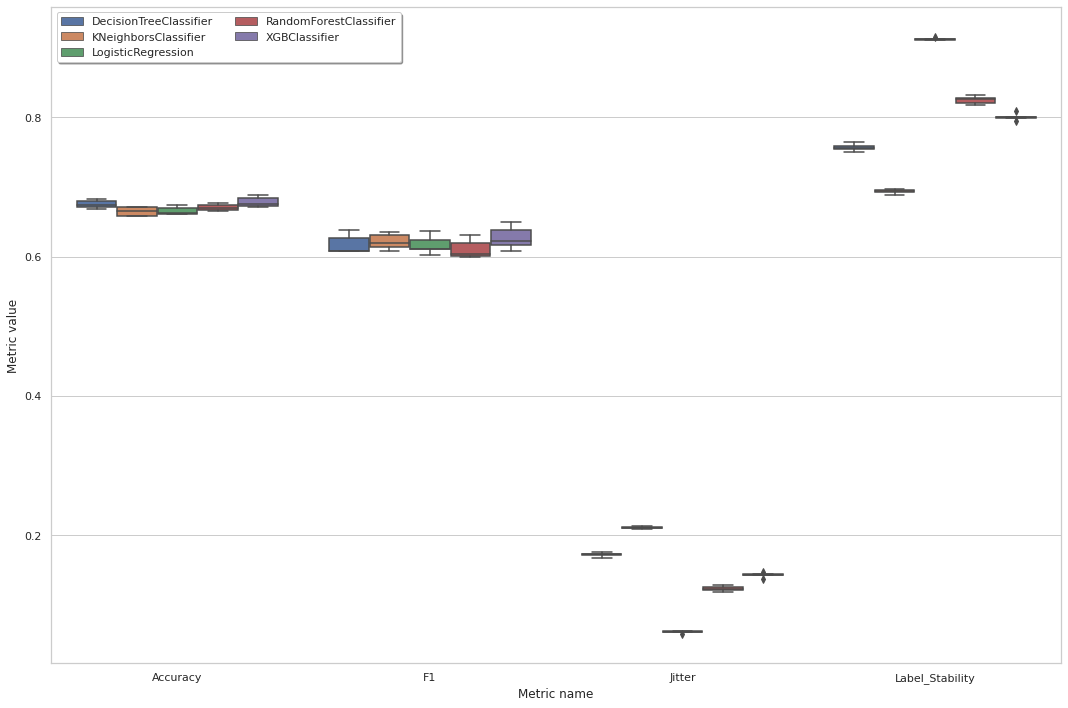

In [93]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                     subgroup_metrics=['F1', 'Accuracy', 'Jitter', 'Label_Stability'])